In [3]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

pd.set_option('display.max_columns', 500)

In [4]:
countries = gpd.read_file('../data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
cities = gpd.read_file('../data/ne_10m_populated_places/ne_10m_populated_places.shp')
rivers  = gpd.read_file('../data/rivers.geojson')

In [5]:
# Merging data

<AxesSubplot:>

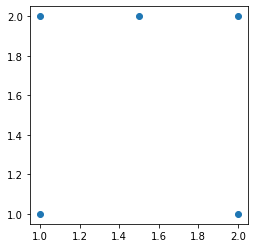

In [6]:

police = gpd.GeoDataFrame({
    'geometry': [Point(1, 1), Point(2, 2),Point(2, 1),Point(1, 2),Point(1.5, 2)],
    'id': [1, 2,3,4,5],
    'criminals': [12,34,112,41, 212]})
police.plot()

In [7]:
neighbor = pd.DataFrame({
    'id': [1, 2,3,4,5],
    'neighbor_id': ['a1', 'a2','a3','c4','d5'],
    'neighbor_name': ['andy','julio','true','skewd', 'tauras']})
neighbor

,id,neighbor_id,neighbor_name
0,1,a1,andy
1,2,a2,julio
2,3,a3,true
3,4,c4,skewd
4,5,d5,tauras


In [8]:
police = police.merge(neighbor, on='id')
police

,geometry,id,criminals,neighbor_id,neighbor_name
0,POINT (1.00000 1.00000),1,12,a1,andy
1,POINT (2.00000 2.00000),2,34,a2,julio
2,POINT (2.00000 1.00000),3,112,a3,true
3,POINT (1.00000 2.00000),4,41,c4,skewd
4,POINT (1.50000 2.00000),5,212,d5,tauras


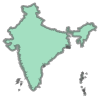

In [9]:
#add continent column to cities

India = countries.loc[countries['ADMIN'] == 'India','geometry'].squeeze()
India

In [10]:
indian_cities = cities[cities.within(India)]

In [11]:
indian_cities

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,CAPIN,WORLDCITY,MEGACITY,SOV0NAME,SOV_A3,ADM0NAME,ADM0_A3,ADM1NAME,ISO_A2,NOTE,LATITUDE,LONGITUDE,CHANGED,NAMEDIFF,DIFFNOTE,POP_MAX,POP_MIN,POP_OTHER,RANK_MAX,RANK_MIN,GEONAMEID,MEGANAME,LS_NAME,LS_MATCH,CHECKME,MAX_POP10,MAX_POP20,MAX_POP50,MAX_POP300,MAX_POP310,MAX_NATSCA,MIN_AREAKM,MAX_AREAKM,MIN_AREAMI,MAX_AREAMI,MIN_PERKM,MAX_PERKM,MIN_PERMI,MAX_PERMI,MIN_BBXMIN,MAX_BBXMIN,MIN_BBXMAX,MAX_BBXMAX,MIN_BBYMIN,MAX_BBYMIN,MIN_BBYMAX,MAX_BBYMAX,MEAN_BBXC,MEAN_BBYC,COMPARE,GN_ASCII,FEATURE_CL,FEATURE_CO,ADMIN1_COD,GN_POP,ELEVATION,GTOPO30,TIMEZONE,GEONAMESNO,UN_FID,UN_ADM0,UN_LAT,UN_LONG,POP1950,POP1955,POP1960,POP1965,POP1970,POP1975,POP1980,POP1985,POP1990,POP1995,POP2000,POP2005,POP2010,POP2015,POP2020,POP2025,POP2050,CITYALT,min_zoom,wikidataid,wof_id,CAPALT,name_en,name_de,name_es,name_fr,name_pt,name_ru,name_zh,label,name_ar,name_bn,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry
560,9,5,1,Admin-1 capital,Panaji,None,None,0,Panaji,0.0,None,0.0,0,India,IND,India,IND,Goa,IN,None,15.491997,73.818001,4.0,1,Added missing admin-1 capital. Population from...,65586,65586,0,8,8,1260607.0,None,None,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,Panaji,P,PPLA,33.0,65586.0,0.0,6.0,Asia/Kolkata,GeoNames match general.,0,None,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,7.0,Q214681,102029109,0,Panjim,Panaji,Panaji,Panaji,Pangim,Панаджи,帕纳吉,None,بانجيم,পানাজি,Πάντζιμ,पणजी,Panadzsi,Panaji,Panaji,パナジ,파나지,Panaji,Panaji,Panaji,Panaji,Panaji,4,1159122667,POINT (73.81800 15.49200)
1352,8,10,1,Admin-1 capital,Simla,None,Shimla,0,Simla,0.0,None,0.0,0,India,IND,India,IND,Himachal Pradesh,IN,None,31.100025,77.166597,1.0,1,Added place. Population from GeoNames.,173503,173503,0,9,9,1256237.0,None,None,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,Shimla,P,PPLA,11.0,173503.0,0.0,1959.0,Asia/Kolkata,GeoNames match general.,0,None,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,7.0,Q83786,102028631,0,Shimla,Shimla,Shimla,Shimla,Shimla,Шимла,西姆拉,None,شيملا,শিমলা,Σίμλα,शिमला,Simlá,Shimla,Shimla,シムラー,심라,Shimla,Shimla,Shimla,Shimla,Shimla,4,1159130425,POINT (77.16660 31.10003)
1353,8,10,1,Populated place,Gurgaon,None,None,0,Gurgaon,0.0,None,0.0,0,India,IND,India,IND,Haryana,IN,None,28.450006,77.019991,0.0,0,None,197340,197340,3212622,9,9,1270642.0,None,Gurgaon,1,0,3377995.0,0.0,0.0,0.0,0.0,10.0,3440.0,3440.0,1328.0,1328.0,2493.0,2493.0,1549.0,1549.0,76.425466,76.425466,77.420882,77.420882,27.842258,27.842258,28.725019,28.725019,76.973246,28.279999,0,Gurgaon,P,PPL,10.0,197340.0,0.0,216.0,Asia/Kolkata,Geonames ascii name + lat.d + long.d matching.,0,None,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,7.0,Q238508,102030161,0,Gurgaon,Gurgaon,Gurgaon,Gurgaon,Gurgaon,Гургаон,古爾岡,None,جورجاون,গুড়গাঁও,Γκούργκαον,गुडगाँव,Gurgáon,Gurgaon,Gurgaon,グルガーオン,구르가온,Gurgaon,Gurgaon,Gurgaon,Gurgaon,Gurgaon,4,1159130429,POINT (77.01999 28.45001)
1354,8,10,1,Populated place,Sonipat,None,None,0,Sonipat,0.0,None,0.0,0,India,IND,India,IND,Haryana,IN,None,28.999999,77.019991,0.0,0,None,250521,250521,1711294,10,10,1255744.0,None,Sonipat,1,0,1788816.0,0.0,0.0,0.0,0.0,10.0,1801.0,1801.0,695.0,695.0,983.0,983.0,611.0,611.0,76.750755,76.750755,77.359985,77.359985,28.725019,28.725019,29.245120,29.245120,77.074304,29.010539,0,Sonipat,P,PPL,10.0,250521.0,0.0,220.0,Asia/Kolkata,Geonames ascii name + lat.d + long.d matching.,0,None,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,7.0,Q41561,102028575,0,Sonipat,Sonipat,Sonipat,Sonipat,Sonipat,Сонипат,索尼帕特,None,سونيبات,সোনিপাত,None,सोन

<AxesSubplot:>

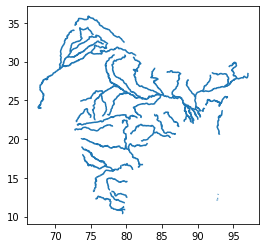

In [12]:
indian_river = rivers[rivers.intersects(India)]
indian_river.plot()

<AxesSubplot:>

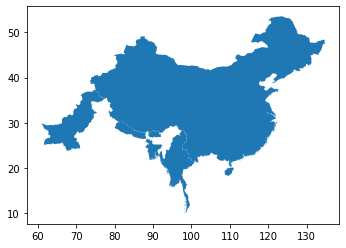

In [13]:
Neighbours_India = countries[countries.touches(India)]
Neighbours_India.plot()

In [14]:
#finding rural area by using overlayer
cities['geometry'] = cities.buffer(3)
rural_india = gpd.overlay(India, cities, how='difference')
rural_india.plot()

<ipython-input-14-9eb29f69e023>:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cities['geometry'] = cities.buffer(3)


AttributeError: 'MultiPolygon' object has no attribute 'crs'

In [15]:
India.crs = "EPSG:4326"

In [16]:
India.crs

'EPSG:4326'

## Working with shapely

shapely is the base library which creates geometry. Geopandas uses the same library to create individual geometry object 
( https://shapely.readthedocs.io/en/stable/project.html )

### Create geometry

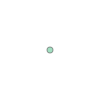

In [21]:
from shapely.geometry import Point, Polygon, LineString

# Point
pt = Point(1,3)
pt

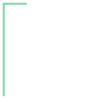

In [22]:
line = LineString([(2, 0), (2, 4), (3, 4)])
line

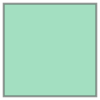

In [24]:
poly = Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])
poly

In [29]:
nasik = Point(73.7595529,19.9637087)

In [30]:
mycountry = countries.contains(nasik)
mycountry

0      False
1      False
2      False
3      False
4      False
       ...  
250    False
251    False
252    False
253    False
254    False
Length: 255, dtype: bool

In [31]:
mycountry = countries[countries.contains(nasik)]
mycountry

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
8,Admin-0 country,0,2,India,IND,0,2,Sovereign country,India,IND,0,India,IND,0,India,IND,0,India,India,IND,India,None,India,IND,Republic of India,None,India,None,None,India,None,1,3,2,2,1281935911,18,8721000.0,2017,2011,2016,3. Emerging region: BRIC,4. Lower middle income,-99,IN,IN,IND,IND,356,356,IN,IND,23424848,23424848,Exact WOE match as country,IND,IND,-99,-99,Asia,Asia,Southern Asia,South Asia,5,5,5,-99,1,0.0,1.7,6.7,1159320847,Q668,الهند,ভারত,Indien,India,India,Inde,Ινδία,भारत,India,India,India,インド,인도,India,Indie,Índia,Индия,Indien,Hindistan,Ấn Độ,印度,"MULTIPOLYGON (((77.80035 35.49541, 77.81533 35..."
